# Convolutional Neural Net with TensorFlow
Generally of the form Input => Convolution => Pooling => Dense (optional) => Output Layer
  
Convolution: usually a 'moving window' of size nxn applied to the input matrix, where n is smaller than the height/width of the image.  
- Essentially aggregates pixels using this moving window to produce a new matrix that is smaller than the input matrix. Ideally, this new matrix summarizes some of the major/important features of the input matrix (maybe lines or edges).  

Pooling: After the convolution produces the convoluted matrix or "feature map", pooling simplifies even further.  
- A max pooling of nxn finds the max value in a nxn window (applied to the feature map) and chooses that value to represent all other elements in the window.   

Conv + Pooling together represent a hidden layer in a CNN.   
After these layers, it is common to see at least 1 dense layer before the output layer. This is optional/adjustable.  


Why convolution?  
> Typically, Convolutional layers are used as feature extractors. Through optimization, these layers learn "kernels" which slide (or convolve) over the input data, generating a number of "feature maps" that can subsequently be used for detecting certain patterns in the data. This is achieved by element-wise multiplications between the slice of input data the filter is currently hovering over, and the weights present within the filter.
- [Source](https://github.com/christianversloot/machine-learning-articles/blob/main/what-is-padding-in-a-neural-network.md)



In [73]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn

In [39]:
# MNIST example
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
## Scale pixels
X_train, X_test = X_train/255.0, X_test/255.0 
## Convert y labels to one-hot encoded
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [40]:
print("Training Data Shape: ", X_train.shape)
print("Single image shape: ", X_train[1,].shape)
print("y_train.shape: ", y_train.shape)

Training Data Shape:  (60000, 28, 28)
Single image shape:  (28, 28)
y_train.shape:  (60000, 10)


https://www.kaggle.com/code/amyjang/tensorflow-mnist-cnn-tutorial/notebook
https://pythonprogramming.net/cnn-tensorflow-convolutional-nerual-network-machine-learning-tutorial/?completed=/convolutional-neural-network-cnn-machine-learning-tutorial/


Here are some example models to better understand CNN parameters. 
We will be using 2D convolutions since we want to convolve in 2 directions - x and y (height and width) of the input. For information on 1D, 2D, and 3D convolutions see [this source](https://stackoverflow.com/questions/42883547/intuitive-understanding-of-1d-2d-and-3d-convolutions-in-convolutional-neural-n).   
In a convolution layer, we specify the number of convolution filters we want in the layer with `filters` and the size of the filter (that moving window) with `kernel_size`.  
`Strides` specifies the movement of the window along the height/width. In this example, we just move the indow 1 pixel at a time over the image, but we could specify other values (For example, if we do 2x2 the outputs of the Convolution layer will have shape 14x14 instead of 28x28).  

The `padding` parameter is used to control how much padding is added to the input.  
When performing the convolution operation the dimensions of the output might be smaller than the input, since the filter (the window moving over the input image) might not fit evenly within the dimensions of the immage. We might be okay with this, for example if we are using convolution layers to aggregate featues. However, we may want to avoid this for various reasons like avoiding a **spatial hierarchy**.  
Check these articles for more information. [Source 1](https://github.com/christianversloot/machine-learning-articles/blob/main/what-is-padding-in-a-neural-network.md). [Source 2](https://github.com/christianversloot/machine-learning-articles/blob/main/how-to-use-padding-with-keras.md).     
From Source 1:  
<div>
<img src="./ref-figures/padding-ex.png" width="500"/>
</div>

For example, consider the models below. With padding = "same", you will see the Output Shape in the model summary matches the input shape: (None, 28, 28, 1). (As long as strides are set to 1).
With padding = "valid", there is no padding. The Output Shape is now smaller than the input shape.  
#### Examples:  


In [19]:
# With Padding
tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    ## filters = 1, kernel_size = (5,5) corresponds to 1 5x5 filter
    ## strides specifices the movement of the window along the height/width
    ## padding corresponds to extra pixels ("padding") around the actual input image. 'Same' pads with zeros evenly around the input 
    tf.keras.layers.Conv2D(filters=1, kernel_size=(5,5), strides=[1,1], padding="same")
]).summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 14, 14, 1)         26        
                                                                 
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


In [18]:
# No Padding
tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    ## strides specifices the movement of the window along the height/width
    ## padding corresponds to extra pixels ("padding") around the actual input image. 'Same' pads with zeros evenly around the input 
    tf.keras.layers.Conv2D(filters=1, kernel_size=(5,5), strides=[1,1], padding="valid")
]).summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 24, 24, 1)         26        
                                                                 
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


Another parameter we can control is the `dilation_rate`. A dilated convolution has gaps between elements in the kernel. [Here's a descriptive image](https://www.quora.com/What-is-the-difference-between-dilated-convolution-and-convolution+stride).  
This will also reduce the size of the output shape since a dilater kernel does not map every pixel.  
Note that, if we were to include padding (padding="same") the output shape would equal the input shape.  

In [33]:
# No Padding, With Dilation
for d in [1, 2]:
    print("Dilation Rate = ", d)
    print(
    tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(filters=1, kernel_size=(5,5), strides=[1,1], padding="valid", dilation_rate=d)
    ]).summary()
    )
    print("---------------------------------------------------------")

Dilation Rate =  1
Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 24, 24, 1)         26        
                                                                 
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________
None
---------------------------------------------------------
Dilation Rate =  2
Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 20, 20, 1)         26        
                                                                 
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________
None
---------------------------------------------------------


# Training A CNN Model
Now it's time to train a CNN model to learn the MNIST data.  
- We input an image (28x28 pixels) and add a 2D convolution layer. We specify we want 32 different filters of size 5x5 and we apply a ReLU activation function to the outputs of the convolutions. We'll say padding="same" to mantain the size of the image before passing the outputs to a max pooling layer.  
- The max pooling layer is a "downsampling" filter. It will produce a smaller output (note the model summary) since it passes a 2x2 matrix over the image and summarizes the (4) pixels within that matrix by the maximum value.  
- We could add more convolutions and pooling, but we will stick with this. Now, before passing to dense layers, we want to flatten the images. This just takes the square matrices and flattens them into a single vector (note that the shape is 14 x 14 x 32 = 64).  
- The output layer is a dense layer with 10 outputs (one for each numer in MNIST) and a softmax activation fn, so that the model predicts the probability of each number for a given image.  

In [41]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = "softmax")
])
model.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_8 (Dense)             (None, 10)                62730     
                                                                 
Total params: 63,562
Trainable params: 63,562
Non-trainable params: 0
_________________________________________________________________


In [44]:
weights = model.get_weights()
reset_model = lambda model: model.set_weights(weights) ##lambda fn to reset model weights to randomly initialized

#loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) ##don't use sparse since we one-hot encoded y

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [48]:
reset_model(model)
history = model.fit(X_train, y_train, epochs = 3, validation_data=(X_test, y_test))

Epoch 1/3
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1721 - accuracy: 0.9475 - val_loss: 0.0669 - val_accuracy: 0.9777
Epoch 2/3
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0591 - accuracy: 0.9819 - val_loss: 0.0520 - val_accuracy: 0.9827
Epoch 3/3
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0434 - accuracy: 0.9870 - val_loss: 0.0453 - val_accuracy: 0.9854


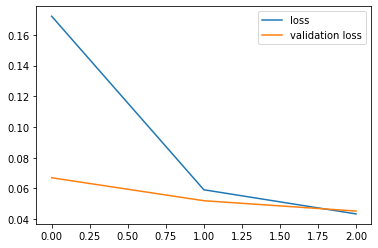

In [49]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

### Confusion Matrix

In [51]:
# Predict model onto test data
y_pred = model.predict(X_test)

313/313 [==============================] - 2s 5ms/step


In [69]:
# Determine class with highest predicted prob
y_pred_class = np.argmax(y_pred, axis=1)
# Convert y_test from one-hot encoded to sparse
y_true = np.argmax(y_test, axis=1)

print(
"y_pred.shape ", y_pred_class.shape,
", y_true.shape ", y_true.shape
)

# compute confusion matrix
conf_mat = tf.math.confusion_matrix(y_true, y_pred_class)

y_pred.shape  (10000,) , y_true.shape  (10000,)


<AxesSubplot:>

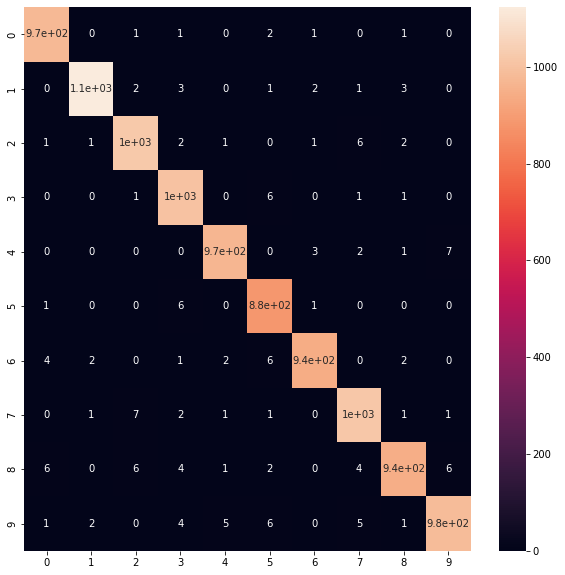

In [74]:
# plot with seaborn
plt.figure(figsize= (10,10))
sn.heatmap(conf_mat, annot=True)

